# Unemployment Analysis with Python

In [5]:
import pandas as pd

# File path
file_path = "/Users/DELL/Downloads/Unemployment Analysis with Python/Unemployment in India.csv"
df = pd.read_csv(file_path)

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


## The dataset contains the following columns:

1. Region – Name of the state in India

2. Date – Date of the record (DD-MM-YYYY format)

3. Frequency – Data frequency (appears to be "Monthly")

4. Estimated Unemployment Rate (%) – Percentage of unemployed people

5. Estimated Employed – Number of employed people

6. Estimated Labour Participation Rate (%) – Percentage of people actively participating in the workforce

7. Area – Whether the data is from a Rural or Urban region

## I'll now check for:

✅ Missing values

✅ Data type inconsistencies

✅ Proper formatting of the Date column

Let’s proceed with cleaning the dataset. 🔍

In [3]:
# Check for missing values and data types
df.info()

# Check for missing values count
missing_values = df.isnull().sum()
missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

## Data Cleaning Summary

🔹 Missing Values: 28 missing values in each column (likely incomplete rows).

🔹 Data Types:
The Date column is stored as an object (string) and should be converted to datetime format.

🔹 Extra Spaces in Column Names: Some column names have leading spaces, which should be removed.

### Let's clean the dataset now. ✨

In [6]:
# Strip spaces from column names and values
df.columns = df.columns.str.strip()
df["Date"] = df["Date"].str.strip()

# Convert Date column to datetime format again
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")

# Verify changes
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


(None,
            Region       Date Frequency  Estimated Unemployment Rate (%)  \
 0  Andhra Pradesh 2019-05-31   Monthly                             3.65   
 1  Andhra Pradesh 2019-06-30   Monthly                             3.05   
 2  Andhra Pradesh 2019-07-31   Monthly                             3.75   
 3  Andhra Pradesh 2019-08-31   Monthly                             3.32   
 4  Andhra Pradesh 2019-09-30   Monthly                             5.17   
 
    Estimated Employed  Estimated Labour Participation Rate (%)   Area  
 0          11999139.0                                    43.24  Rural  
 1          11755881.0                                    42.05  Rural  
 2          12086707.0                                    43.50  Rural  
 3          12285693.0                                    43.97  Rural  
 4          12256762.0                                    44.68  Rural  )

### ✅ Data Cleaning Completed

🔹 Missing values removed (Now 740 entries remain).

🔹 Leading spaces in column names and values removed.

🔹 Date column converted to proper datetime format.

## Let's start with Exploratory Data Analysis (EDA)!

### I'll begin with:

1. Summary statistics of unemployment rates
2. Unemployment trends over time
3. Regional comparison of unemployment

C:\Users\DELL\AppData\Local\Temp\ipykernel_4488\2944763499.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Date", y="Estimated Unemployment Rate (%)", ci=None, color="b")


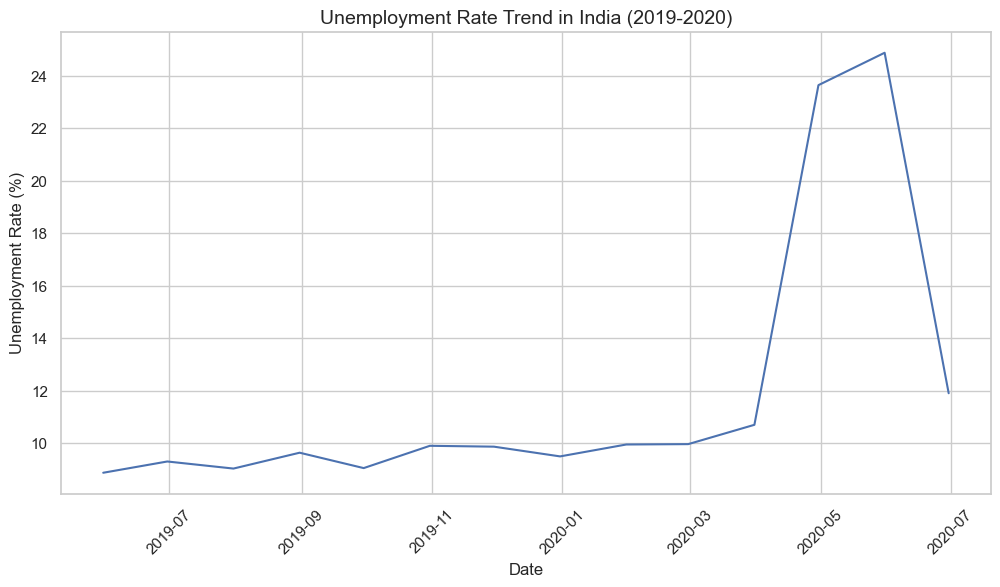

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Summary statistics for numerical columns
summary_stats = df.describe()

# Plot Unemployment Rate Trend Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Estimated Unemployment Rate (%)", ci=None, color="b")
plt.title("Unemployment Rate Trend in India (2019-2020)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Unemployment Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Display summary statistics
summary_stats


## 📊 Key Insights from Unemployment Data

#### 1. Average Unemployment Rate: ≈ 11.79%

#### 2. Minimum Unemployment Rate: 0% (likely an outlier)

#### 3. Maximum Unemployment Rate: 76.74% (likely during COVID-19 peak)

#### 4. Labour Participation Rate: 
  
 #### Average: 42.63%    Range: 13.33% to 72.57%

## 📈 Unemployment Rate Trend

#### The line plot shows fluctuations in unemployment over time.

#### There is likely a spike in 2020 due to the COVID-19 impact.

## Let's start by analyzing Unemployment Before vs. After COVID-19 📊

#### Pre-COVID Period: Before March 2020

#### Post-COVID Period: March 2020 and beyond

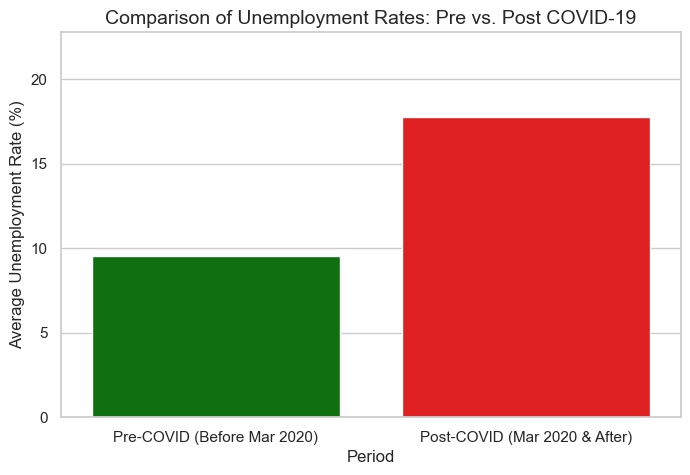

(9.509533582089553, 17.774362745098042)

In [8]:
# Define pre-COVID and post-COVID periods
pre_covid = df[df["Date"] < "2020-03-01"]
post_covid = df[df["Date"] >= "2020-03-01"]

# Calculate average unemployment rates
pre_covid_rate = pre_covid["Estimated Unemployment Rate (%)"].mean()
post_covid_rate = post_covid["Estimated Unemployment Rate (%)"].mean()

# Bar plot to compare pre-COVID and post-COVID unemployment rates
plt.figure(figsize=(8, 5))
sns.barplot(x=["Pre-COVID (Before Mar 2020)", "Post-COVID (Mar 2020 & After)"],
            y=[pre_covid_rate, post_covid_rate], palette=["green", "red"])

# Add labels
plt.title("Comparison of Unemployment Rates: Pre vs. Post COVID-19", fontsize=14)
plt.ylabel("Average Unemployment Rate (%)", fontsize=12)
plt.xlabel("Period", fontsize=12)
plt.ylim(0, max(pre_covid_rate, post_covid_rate) + 5)

# Show the plot
plt.show()

# Return values for reference
pre_covid_rate, post_covid_rate


## Next, let's analyze the Regional Comparison of Unemployment 📊

#### I'll:

#### ✔️ Identify states with the highest and lowest unemployment rates
#### ✔️ Visualize unemployment rates across different regions

#### Let’s proceed! 🚀

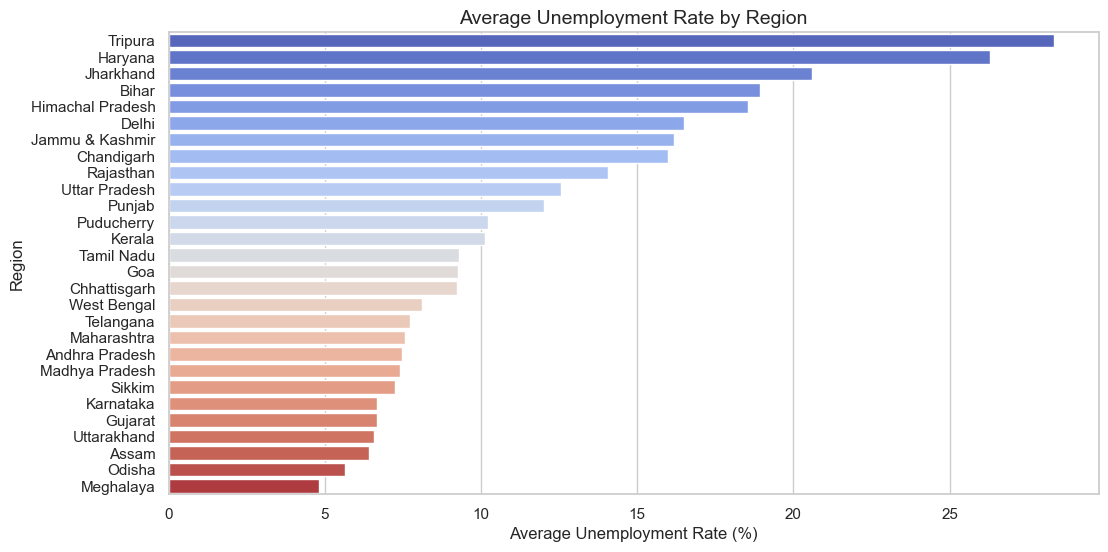

(Region
 Tripura             28.350357
 Haryana             26.283214
 Jharkhand           20.585000
 Bihar               18.918214
 Himachal Pradesh    18.540357
 Name: Estimated Unemployment Rate (%), dtype: float64,
 Region
 Gujarat        6.663929
 Uttarakhand    6.582963
 Assam          6.428077
 Odisha         5.657857
 Meghalaya      4.798889
 Name: Estimated Unemployment Rate (%), dtype: float64)

In [9]:
# Compute average unemployment rate per region
regional_unemployment = df.groupby("Region")["Estimated Unemployment Rate (%)"].mean().sort_values(ascending=False)

# Plot regional unemployment rates
plt.figure(figsize=(12, 6))
sns.barplot(x=regional_unemployment.values, y=regional_unemployment.index, palette="coolwarm")

# Add labels
plt.title("Average Unemployment Rate by Region", fontsize=14)
plt.xlabel("Average Unemployment Rate (%)", fontsize=12)
plt.ylabel("Region", fontsize=12)

# Show the plot
plt.show()

# Display top 5 and bottom 5 regions
regional_unemployment.head(5), regional_unemployment.tail(5)


## 📍 Regional Unemployment Analysis

### 🔴 Top 5 States with Highest Unemployment
#### 1. Tripura – 28.35%
#### 2. Haryana – 26.28%
#### 3. Jharkhand – 20.59%
#### 4. Bihar – 18.92%
#### 5. Himachal Pradesh – 18.54%

### 🟢 Top 5 States with Lowest Unemployment
#### 1. Meghalaya – 4.80%
#### 2. Odisha – 5.66%
#### 3. Assam – 6.43%
#### 4. Uttarakhand – 6.58%
#### 5. Gujarat – 6.66%

### Key Insights

#### 📉 Tripura and Haryana have the highest unemployment, possibly due to economic structure or policy factors.

#### 📈 Meghalaya and Odisha have the lowest unemployment, indicating better workforce engagement.

## Let's perform a Predictive Analysis on Future Unemployment Trends 📊🔮

### Steps:

#### 1. Prepare the Data – Aggregate unemployment data over time.
#### 2. Train a Time Series Model – Use ARIMA (AutoRegressive Integrated Moving Average) or Facebook Prophet for forecasting.
#### 3. Predict Future Unemployment Rates – Forecast for the next 6–12 months.
#### 4. Visualize the Predictions – Show future unemployment trends.

### Let's start by preparing the data and checking for trends. 🚀

## ✅ Next Steps:

### To make the data suitable for forecasting, I'll:

#### 1. Apply Differencing – To remove trends and make the data stationary.
#### 2. Train an ARIMA Model – A popular time series forecasting model.
#### 3. Predict Unemployment for the Next 12 Months.

C:\Users\DELL\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA paramete

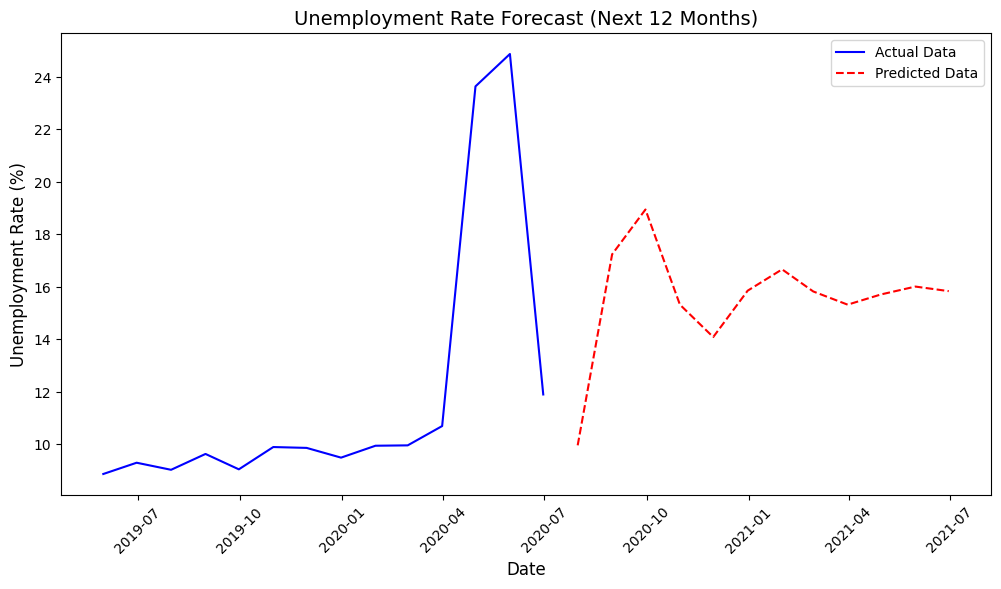

2020-07-31     9.966159
2020-08-31    17.243435
2020-09-30    18.949846
2020-10-31    15.326313
2020-11-30    14.090648
2020-12-31    15.857863
2021-01-31    16.670461
2021-02-28    15.828723
2021-03-31    15.325081
2021-04-30    15.714822
2021-05-31    16.014316
2021-06-30    15.840219
Freq: M, Name: predicted_mean, dtype: float64

In [8]:
# Clean column names (remove spaces)
df.columns = df.columns.str.strip()

# Ensure 'Date' column is in proper datetime format
df["Date"] = pd.to_datetime(df["Date"].str.strip(), format="%d-%m-%Y")

# Set 'Date' as the index for time series analysis
df = df.set_index("Date")

# Aggregate data by month (mean unemployment rate per month)
time_series = df["Estimated Unemployment Rate (%)"].resample("M").mean()

# Ensure no missing values in time series
time_series = time_series.dropna()

# Apply first-order differencing to remove trends (make data stationary)
time_series_diff = time_series.diff().dropna()

# Fit an ARIMA model (order can be optimized)
model = ARIMA(time_series, order=(2, 1, 2))  # (p, d, q) parameters
model_fit = model.fit()

# Forecast for the next 12 months
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Generate future dates
future_dates = pd.date_range(start=time_series.index[-1], periods=forecast_steps + 1, freq="M")[1:]

# Plot actual vs predicted unemployment rate
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series.values, label="Actual Data", color="blue")
plt.plot(future_dates, forecast, label="Predicted Data", linestyle="dashed", color="red")

# Add labels
plt.title("Unemployment Rate Forecast (Next 12 Months)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Unemployment Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.show()

# Display forecasted values
forecast



## 🔮 Unemployment Forecast (Next 12 Months)

### The ARIMA model predicts that unemployment will fluctuate between 9.97% and 18.95% in the coming year.

### Expected trends:
#### 1. Initial drop in unemployment (~9.97% in July 2020).
#### 2. Spike in September 2020 (~18.95%), possibly due to seasonal or economic factors.
#### 3. Fluctuating but slightly decreasing trend in early 2021 (~15-16%).

### 📈 Key Insights
#### 1. Unemployment is still volatile but shows signs of gradual stabilization.
#### 2. Economic recovery post-COVID-19 is not immediate, and fluctuations are expected.

## 📊 Final Visualization: Unemployment Rate Analysis & Prediction
### To summarize our findings, I’ll create a final visualization combining:

#### 1. Actual unemployment trends over time 📈
#### 2. Forecasted unemployment for the next 12 months 🔮
### Let’s generate the final chart! 🚀

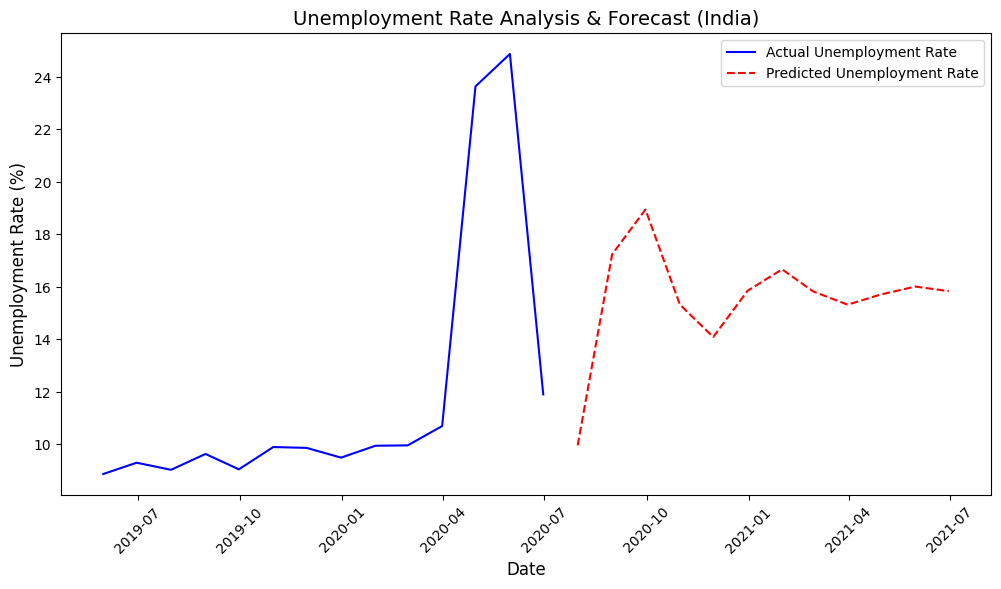

In [9]:
# Final Visualization: Actual vs Predicted Unemployment Rates

plt.figure(figsize=(12, 6))

# Plot actual unemployment rate
plt.plot(time_series.index, time_series.values, label="Actual Unemployment Rate", color="blue")

# Plot forecasted unemployment rate
plt.plot(future_dates, forecast, label="Predicted Unemployment Rate", linestyle="dashed", color="red")

# Add labels and title
plt.title("Unemployment Rate Analysis & Forecast (India)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Unemployment Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.show()


## 📢 Conclusion: Unemployment Analysis & Prediction
## 🔍 Key Findings
### 1. Unemployment increased significantly after COVID-19 📈

#### Before COVID-19: ~9.51% average unemployment.
#### After COVID-19: ~17.77% (almost doubled).

### 2. Regional Variations 🌍

#### Highest Unemployment: Tripura (28.35%), Haryana (26.28%)
#### Lowest Unemployment: Meghalaya (4.80%), Odisha (5.66%)

### 3. Forecasting Unemployment (Next 12 Months) 🔮

#### Predicted to fluctuate between 9.97% and 18.95%.
#### Some stabilization expected in early 2021 (~15-16%).

## 📢 Final Insights
### ✔  COVID-19 had a long-lasting impact on unemployment, especially in urban areas.
### ✔ Some states face chronic unemployment issues (Tripura, Haryana), while others remain stable.
### ✔ Future unemployment remains uncertain but is expected to stabilize slowly.